We first import the raw data and combine them into a single dataframe.

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

f = open('two-L.pkl', 'rb')
pos, neg = pickle.load(f)
f.close()

df = pd.DataFrame(pd.read_pickle('two-L.pkl') )

df

,0,1,2,3,4,5,6,7,8,9,...,540,541,542,543,544,545,546,547,548,549
0,"(-0.06440923765777315, 0.06440923765777315)","(-0.05247228043498854, 0.09247228043498855)","(0.036683209553086904, 0.0433167904469131)","(0.09822718254858159, 0.021772817451418403)","(0.13460866075520708, 0.025391339244792928)","(0.09843327415841416, 0.10156672584158585)","(0.17110515850054364, 0.06889484149945635)","(0.2118414722551265, 0.06815852774487352)","(0.15003440117581232, 0.16996559882418769)","(0.17333126976706975, 0.18666873023293024)",...,"(-0.0626629251271591, 1.8973370748728406)","(0.021793114415950443, 1.9857931144159504)","(-0.02997851629471393, 1.938021483705286)","(-0.041831857791329474, 1.9301681422086705)","(-0.023066909770904864, 1.9529330902290951)","(-0.02719015456348539, 1.9528098454365146)","(-0.04074996469944736, 1.9432500353005526)","(-0.04543343059077287, 1.9425665694092271)","(0.08460537139725455, 2.0766053713972545)","(-0.03161474894693028, 1.9643852510530697)"
1,"(0.9514329789507939, -0.9514329789507939)","(1.0902535780093703, -1.0502535780093702)","(1.012789449584667, -0.9327894495846669)","(1.122528313929786, -1.0025283139297858)","(1.1029310931768734, -0.9429310931768733)","(1.0682076315676476, -0.8682076315676475)","(1.1465308329762594, -0.9065308329762594)","(1.2382404380660925, -0.9582404380660925)","(1.1876163664384642, -0.8676163664384643)","(1.1878817560689592, -0.8278817560689592)",...,"(1.931232720922087, -2.028767279077913)","(1.970853809665953, -1.993146190334047)","(2.0408110659321137, -1.9271889340678858)","(1.9438006548274767, -2.0281993451725233)","(1.9721362582355582, -2.003863741764442)","(1.9849420216299543, -1.9950579783700457)","(1.9610163404543544, -2.0229836595456456)","(1.992338189432039, -1.9956618105679609)","(2.007640547363142, -1.9843594526368582)","(2.050112525588406, -1.945887474411594)"


# a) Discriminative Approach

We first implement the logistic regression.

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def prediction(x, ws, b):
    return sigmoid(np.dot(x,ws)+b)

def error(prediction, ys):
    left = np.dot(ys.T, np.log(prediction))
    right = np.dot((1 - ys).T, np.log(1 - prediction))
    return -1 * np.sum(left + right) / (len(ys))



def update(b, ws, X, prediction, ys, step_size):
    ws_new = ws - step_size * (1/len(X)) * (X.T.dot(prediction-ys))
    
    b_new = b - step_size * (1/len(X)) * np.sum((prediction - ys))
    
    return b_new, ws_new

def fit(X,y, epochs):
    loss = []
    ws = np.random.rand(X.shape[1],1)

    b = random.random()
    for i in range(epochs+1):
        predictions = prediction(X,ws,b)
        errors = error(predictions,y)
        loss.append(errors)
        b, ws = update(b, ws, X, predictions, y, step_size = 0.1)
    return b,ws, loss


We apply our logistic regression to our data. We randomly initialize the weights **ws** and bias term **b**. As for hyperparameters, we choose step size to equal to 0.1, and the number of epochs equal to 1000, meaning that **ws** and **b** will be updated for 1000 times. After running the logistic regression, we will use our **ws** and **b** to draw a linear boundary to classify two classes.

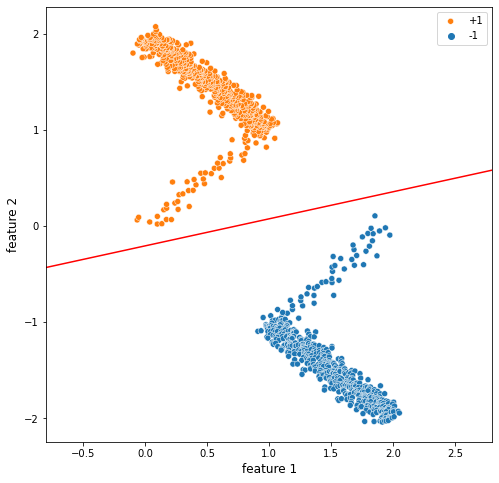

In [3]:
features = np.array(pos+neg)

feature_1 = [pos[i][0] for i in range(len(pos))] + [neg[i][0] for i in range(len(neg))]
feature_2 = [pos[i][1] for i in range(len(pos))] + [neg[i][1] for i in range(len(neg))]

# convert the positive and negative class to 1 and 0 respectively when computing our parameters with gradient descent
label = [1 for i in range(len(pos))] + [0 for i in range(len(neg))]
ground_truth = np.array([[1] for i in range(len(pos))] + [[0] for i in range(len(neg))])

given_data = pd.DataFrame({"feature 1": feature_1, "feature 2": feature_2, "ground truth": label})



b,ws,loss = fit(features,ground_truth, 1000)

w_1, w_2 = ws[0][0], ws[1][0]

fig, ax1 = plt.subplots(1,1,figsize = (8,8))
sns.scatterplot(data = given_data, x = "feature 1", y ="feature 2", hue = "ground truth")



c = - b/w_2
m = - w_1 / w_2

xd = np.linspace(min(given_data.iloc[:,0])-1, max(given_data.iloc[:,0])+1, len(given_data))

yd = m*xd + c

ax1.plot(xd, yd, 'r', ls='-')
ax1.set_xlim([-0.8,2.8])
ax1.set_xlabel('feature 1',fontsize = 12)
ax1.set_ylabel('feature 2',fontsize = 12)
ax1.legend(['+1','-1'])
plt.show()

We have also recorded the total loss over the entire data, starting from the initialization of **ws** and **b** to finishing 1000 iterations.

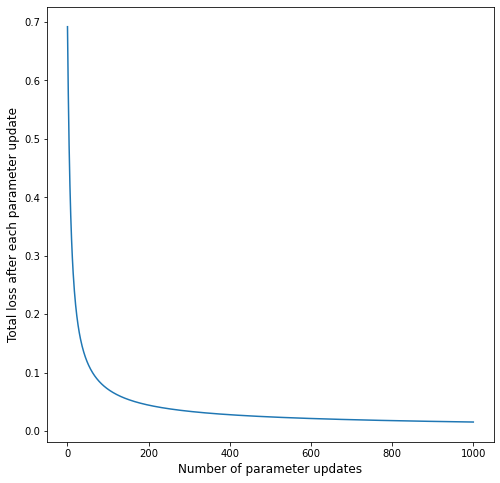

In [4]:
fig, ax2 = plt.subplots(1,1,figsize = (8,8))
ax2.plot([i for i in range(len(loss))], loss)
ax2.set_xlabel('Number of parameter updates', fontsize = 12)
ax2.set_ylabel('Total loss after each parameter update', fontsize = 12)
plt.show()

# b) Generative Approach

The generative approach assumes that points from the positive class is drawn from a Gaussian *N* ($\mu_1$, $\Sigma_1$), and points from the negative class is drawn from another Gaussian *N* ($\mu_2$, $\Sigma_2$).
The linear boundary will be the line that passes through $\frac{\mu_1 + \mu_2}{2}$ while perpendicular to the vector $\mu_2 - \mu_1$.

In [5]:
miu_1 = np.mean(pos, axis = 0)
miu_2 = np.mean(neg, axis = 0)
print("mu 1: " + str(miu_1))
print("mu 2: " + str(miu_2))

sigma_1 = np.cov(features[0:550, :],rowvar = False)
sigma_2 = np.cov(features[550:,:], rowvar = False)
print("Sigma 1: " + str(sigma_1))
print("Sigma 2: " + str(sigma_2))


#Find the coordinate of: (mu_1 + mu_2) / 2
mean_of_mean = np.sum([miu_1, miu_2], axis = 0) / 2
mean_of_mean

difference_of_mean = miu_1 - miu_2
difference_of_mean

#Compute the slope of the vector: mu_2 - mu_1
difference_of_mean_slope = difference_of_mean[1] / difference_of_mean[0]

#Find the line that is perpendicular to mu_2 - mu_1, and also passes through the point (mu_1 + mu_2) / 2
perpendicular_slope = -1 / difference_of_mean_slope
perpendicular_intercept = mean_of_mean[1] - perpendicular_slope * mean_of_mean[0]


mu 1: [0.50043094 1.40876891]
mu 2: [ 1.49613188 -1.41197055]
Sigma 1: [[ 0.08769148 -0.06476821]
 [-0.06476821  0.16757463]]
Sigma 2: [[ 0.08505502 -0.06636973]
 [-0.06636973  0.16767939]]


In the graph below, the purple and green point respectively represent the coordinate of $\mu_1$ and the coordinate of $\mu_2$.
The yellow point is $\frac{\mu_1 + \mu_2}{2}$, the black vector denotes $\mu_2 - \mu_1$. The red line is the linear boundary generated using the generative approach.

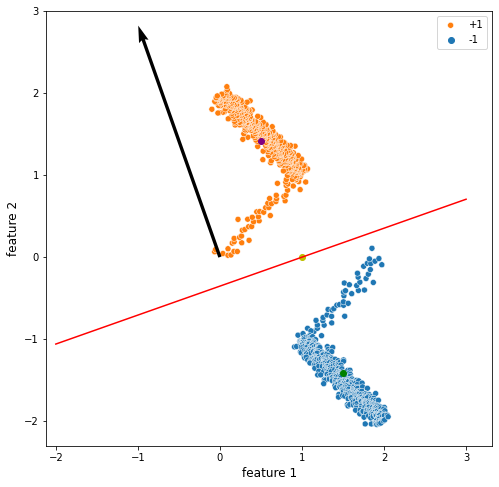

In [6]:
fig, ax3 = plt.subplots(1,1, figsize = (8,8))
plt.axis('equal')
ax3.set_ylim(-2.3,3)
ax3.set_xlim(-1.2,2.4)
sns.scatterplot(data = given_data, x = "feature 1", y ="feature 2", hue = "ground truth")
ax3.scatter(mean_of_mean[0], mean_of_mean[1], c ='y')
ax3.scatter(miu_1[0], miu_1[1], c = 'purple')
ax3.scatter(miu_2[0], miu_2[1], c= 'green')

ax3.quiver(0, 0, difference_of_mean[0] , difference_of_mean[1], angles='xy', scale_units='xy', scale=1)

x = [-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0, 2.5, 3.0]
y = [(perpendicular_slope * i + perpendicular_intercept) for i in x]
ax3.set_xlabel('feature 1',fontsize = 12)
ax3.set_ylabel('feature 2',fontsize = 12)
ax3.legend(['+1','-1'])
ax3.plot(x, y, color = 'r')


plt.show()


# c) Pros and Cons of Both Approaches

## Discriminative Approach

### Pros
Discriminative model directly learns the conditional probability of the classes given input features. This can make the discriminative model simpler comparing to the generative model.

Besides, the discriminative model is more robust to outliers compared to the generative model. One reason is that the prior task of the discriminative model is to correctly separate different classes of data points rather than to model how the entire data is arranged. Another reason would be that the outliers deviate too much from the majority of the data and will not heavily influence the estimation of the conditional probability of the classes given input features.

### Cons
Discriminative model may not perform well on imbalanced datasets where the number of data points in different classes are significantly unequal. It will struggle to accurately classify classes with small number of data points.

Discriminative model relies heavily on the relevance of input features. If the features contain irrelevant information, the performance of the discriminative model will be adversely affected.

## Generative Appraoch

### Pros
The generative model explicitly model the joint distribution of the input features and classes, which allows for direct estimation of class probabilities.

### Cons
The generative model assumes a specific distribution of the input data. If the assumption is inaccurate, this may lead to a biased model.

Since the generative model models the joint probability of input features and classes, it is also prone to features that contain irrelevant information.

The generative model tends to be more computationally expensive than the discriminative model due to its goal of modeling the joint distribution of input features and classes.